In [1]:
!pip install igraph
!pip install networkx
!pip install gcastle
!apt install libcairo2-dev


import numpy as np
import pandas as pd
import igraph as ig
import scipy
import networkx as nx
import torch

from igraph import Graph

import matplotlib.pyplot as plt

from scipy.stats import mstats
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.algorithms import Notears, NotearsNonlinear, PC, GES, DAG_GNN

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at 

2023-11-08 15:55:39,792 - /opt/anaconda3/lib/python3.9/site-packages/castle/backend/__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2023-11-08 15:55:39,856 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


# Loading Data and visualizing network
Also constructing an igraph Graph object

In [12]:
import numpy as np
import pandas as pd
import igraph as ig
import scipy
import networkx as nx
import torch

from igraph import Graph


import matplotlib.pyplot as plt

from scipy.stats import mstats
from castle.common import GraphDAG
from castle.metrics import MetricsDAG
from castle.algorithms import Notears, NotearsNonlinear, PC, GES, DAG_GNN

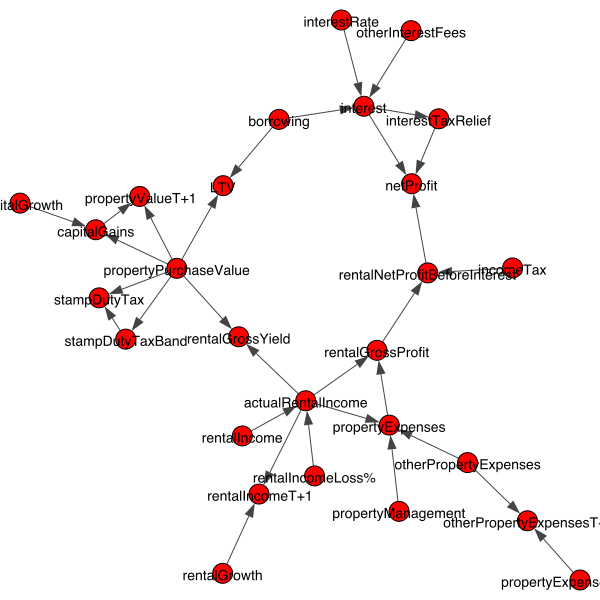

In [13]:
edges = pd.read_csv('GroundTruth.csv')
data = pd.read_csv('trainingData_PROPERTY_N_1k.csv')

vertices = pd.DataFrame(data.columns)


g = Graph.DataFrame(edges=edges, directed=True, use_vids=False, vertices = vertices)
layout = g.layout(layout= 'kamada_kawai')
visual_style = {}
visual_style["vertex_label"] = g.vs["name"]

ig.plot(g,layout = layout, **visual_style)


In [21]:
data1=data

In [32]:
from sklearn.preprocessing import LabelEncoder# creating initial dataframe

labelencoder = LabelEncoder()# Assigning numerical values and storing in another column

# transforming data to a numerical value
for item in data.columns:
    data[item] = labelencoder.fit_transform(data[item])

In [34]:
# applying Notears algo
nt03 = Notears(w_threshold = 0.3)  # drop edge if |weight| < threshold
nt01 = Notears(w_threshold = 0.1)
nt02 = Notears(w_threshold = 0.2)

nt03.learn(data)
nt01.learn(data)
nt02.learn(data)

nt01_graph = Graph.Adjacency(nt01.causal_matrix)
nt02_graph = Graph.Adjacency(nt02.causal_matrix)
nt03_graph = Graph.Adjacency(nt03.causal_matrix)


2023-11-08 16:19:48,031 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:195] - INFO: [start]: n=1000, d=27, iter_=100, h_=1e-08, rho_=1e+16
2023-11-08 16:19:48,094 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 0] h=4.443e-01, loss=25.980, rho=1.0e+00
2023-11-08 16:19:48,135 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=3.387e-01, loss=19.870, rho=1.0e+00
2023-11-08 16:19:48,181 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=1.793e-01, loss=20.758, rho=1.0e+01
2023-11-08 16:19:48,256 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 1] h=6.733e-02, loss=29.643, rho=1.0e+02
2023-11-08 16:19:48,337 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/gradient/n

2023-11-08 16:19:57,606 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 8] h=5.760e-07, loss=22.018, rho=1.0e+10
2023-11-08 16:19:57,796 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 9] h=3.408e-07, loss=21.988, rho=1.0e+10
2023-11-08 16:19:58,060 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 9] h=1.275e-07, loss=22.003, rho=1.0e+11
2023-11-08 16:19:58,172 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 10] h=7.725e-08, loss=21.991, rho=1.0e+11
2023-11-08 16:19:58,505 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/gradient/notears/linear.py[line:206] - INFO: [iter 10] h=2.906e-08, loss=21.998, rho=1.0e+12
2023-11-08 16:19:58,666 - /opt/anaconda3/lib/python3.9/site-packages/castle/algorithms/gradient/notears

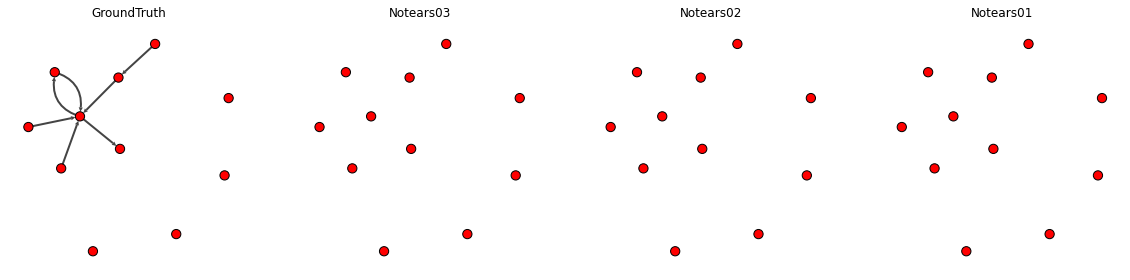

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

axs[0].set_title('GroundTruth')
ig.plot(g,  bbox=(0, 0, 300, 300), layout = layout, target=axs[0])
axs[1].set_title("Notears03")
ig.plot(nt03_graph,  bbox=(0, 0, 300, 300), layout = layout, target = axs[1])
axs[2].set_title("Notears02")
ig.plot(nt02_graph,  bbox=(0, 0, 300, 300), layout = layout, target = axs[2])
axs[3].set_title('Notears01')
ig.plot(nt01_graph,  bbox=(0, 0, 300, 300), layout = layout, target=axs[3])

#axs[1][1].set_title("NotearsNonlinear03")
#ig.plot(ntnl03_graph,  bbox=(0, 0, 300, 300), layout = layout, target = axs[1][1])
#axs[1][2].set_title("NotearsNonlinear02")
#ig.plot(ntnl02_graph,  bbox=(0, 0, 300, 300), layout = layout, target = axs[1][2])
#axs[1][3].set_title('NotearsNonlinear01')
#ig.plot(ntnl01_graph,  bbox=(0, 0, 300, 300), layout = layout, target=axs[1][3])



plt.show()

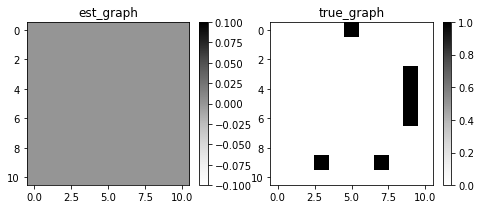

In [6]:
# Converting adjacency matrix into np.array
gt_adj = g.get_adjacency()
list_matrix = list(map(list, gt_adj))
gt_adj = np.array(list_matrix)
# plot predict_dag and true_dag adj matrices
GraphDAG(nt01.causal_matrix, gt_adj, 'result')

### Notears Nonlinear

### PC algorithm

In [11]:
mt_notears = MetricsDAG(nt01.causal_matrix, gt_adj)
mt_notears_02 = MetricsDAG(nt02.causal_matrix, gt_adj)

print(mt_notears.metrics)
print(mt_notears_02.metrics)


{'fdr': 0.0, 'tpr': 0.2857, 'fpr': 0.0, 'shd': 6, 'nnz': 0, 'precision': nan, 'recall': 0.0, 'F1': nan, 'gscore': 0.0}
{'fdr': 0.0, 'tpr': 0.2857, 'fpr': 0.0, 'shd': 6, 'nnz': 0, 'precision': nan, 'recall': 0.0, 'F1': nan, 'gscore': 0.0}
